In [1]:
#Data Description
#User_ID	
#Cust_name											
#Product_ID
#Gender
#Age Group
#Age
#Marital_Status: 0= Married, 1= Unmarried
#State: State they belong
#Zone:Central, Eastern, Western, Northern, Southern
#Occupation: Occupation of the customer
#Product_Category: Type of the product Bought
#Orders: No of Orders
#Amount: Amoun spent by a customer in rupees

In [5]:
#importing the Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#importing the data 
data=pd.read_csv("Diwali Sales Data.csv")

In [14]:
# upper 10 rows
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [18]:
#rows and columns of the Data 
data.shape
#(rows=11251, Columns=15)

(11251, 15)

In [19]:
#data information
data.info()
#in amount column there are some null values 
#Status and unnamed1 column are of no use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [20]:
#removing the unwanted columns
data.drop(["Status","unnamed1"],axis=1,inplace=True)

In [21]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [25]:
#checking the null values
data.isnull().sum()
#there are 12 null values inside the amount column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [26]:
#dropping the null values
data.dropna(inplace = True)

In [28]:
data.shape

(11239, 13)

In [36]:
#checking the statistical values of numerical data
data[["Age","Orders","Amount"]].describe()
#here we can see that average age of customer is 35 and 75% of the people are under the age 43 years
#also we can say that average order per person is 2.5 unit
#average amount spent per person is aprrox ₹9500 

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


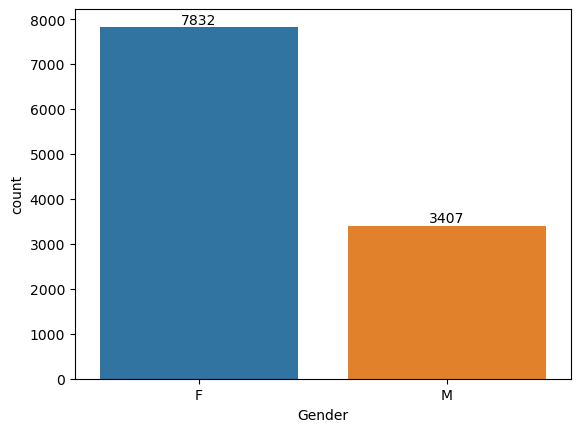

In [39]:
#gender ratio
ax=sns.countplot(x="Gender",data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#as we can see that there are maximum female customers as compared to males
#there are 7832 females and 3407 males

  Gender       Amount
0      F  74335856.43
1      M  31913276.00


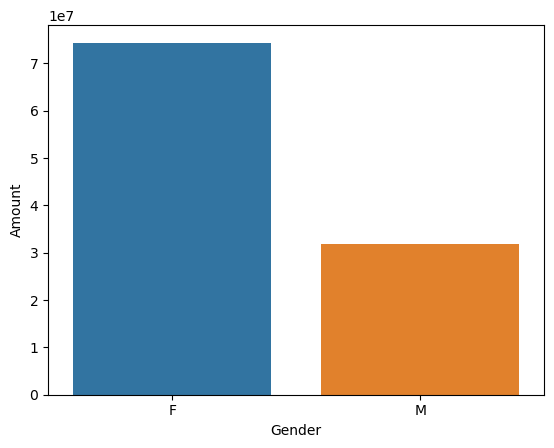

In [47]:
#total amount spent as per gender
print(data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False))
a=data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
k=sns.barplot(x="Gender",y="Amount",data=a)
#as we can see that female counterparts are spending high as compared to male counterparts.

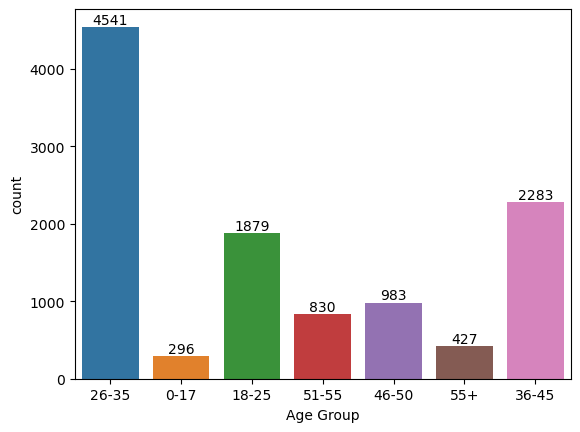

In [50]:
#countplot for age group
p=sns.countplot(x="Age Group",data=data)
for bars in p.containers:
    p.bar_label(bars)
#here we can see maximum customers are from age group between 26-35,35-45 and 38-25 resepectively

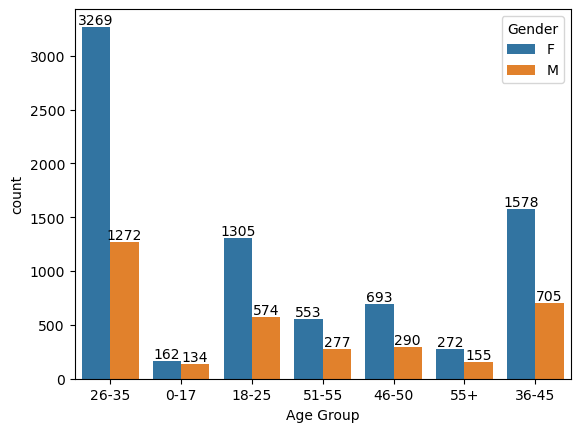

In [51]:
#countplot for age group with respect to genders
p=sns.countplot(x="Age Group",data=data, hue="Gender")
for bars in p.containers:
    p.bar_label(bars)
#females are still dominating in terms of purchase

  Age Group       Amount
2     26-35  42613443.94
3     36-45  22144995.49
1     18-25  17240732.00
4     46-50   9207844.00
5     51-55   8261477.00
6       55+   4080987.00
0      0-17   2699653.00


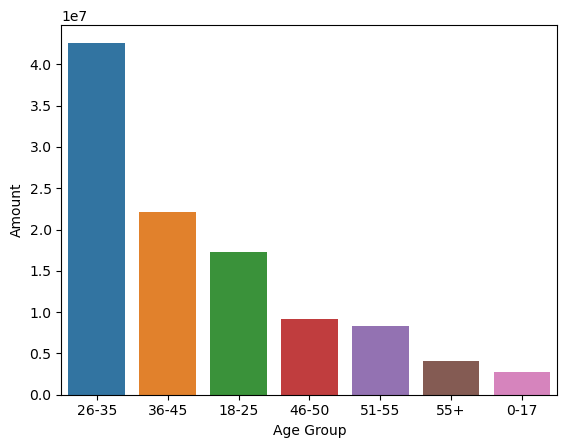

In [53]:
print(data.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False))
j=data.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
l=sns.barplot(x="Age Group",y="Amount",data=j)
#here we can see maximum total amount spent are from age group between 26-35,35-45 and 38-25 resepectively.

In [57]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

   Marital_Status       Amount
0               0  62125386.44
1               1  44123745.99


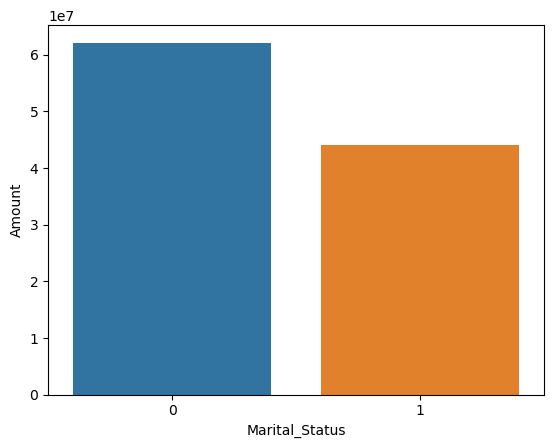

In [58]:
#countplot for marital status with respect to amount spent
print(data.groupby(["Marital_Status"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False))
a=data.groupby(["Marital_Status"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
k=sns.barplot(x="Marital_Status",y="Amount",data=a)
#here, married people are spending more as compared to unmarried people

   Marital_Status  Orders
0               0   16249
1               1   11732


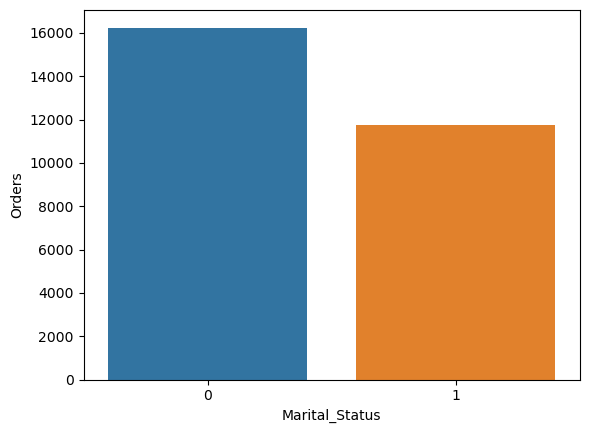

In [59]:
#countplot for marital status with respect to number of orders
print(data.groupby(["Marital_Status"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False))
a=data.groupby(["Marital_Status"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
k=sns.barplot(x="Marital_Status",y="Orders",data=a)
#in terms of number of orders also married people are dominating

             State  Orders
14   Uttar Pradesh    4807
10     Maharashtra    3810
7        Karnataka    3240
2            Delhi    2740
9   Madhya Pradesh    2252


<Axes: xlabel='State', ylabel='Orders'>

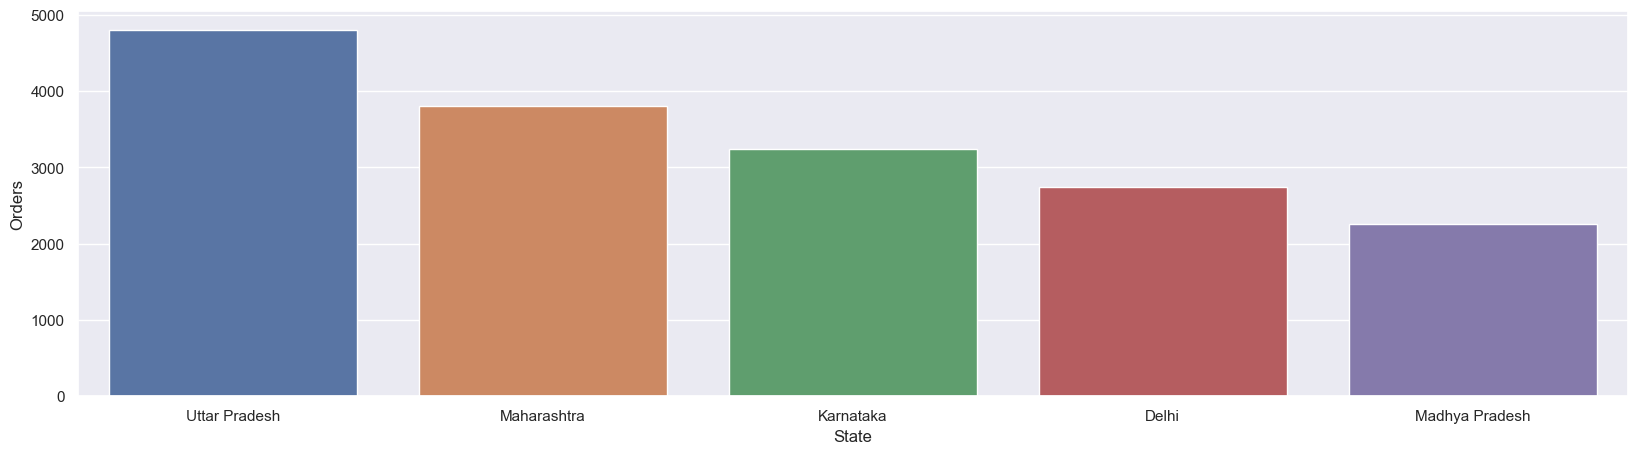

In [78]:
#orders from different states (top 5 w.r.t orders)
print(data.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5))
a=data.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(x="State",y="Orders",data=a)


             State       Amount
14   Uttar Pradesh  19374968.00
10     Maharashtra  14427543.00
7        Karnataka  13523540.00
2            Delhi  11603819.45
9   Madhya Pradesh   8101142.00


<Axes: xlabel='State', ylabel='Amount'>

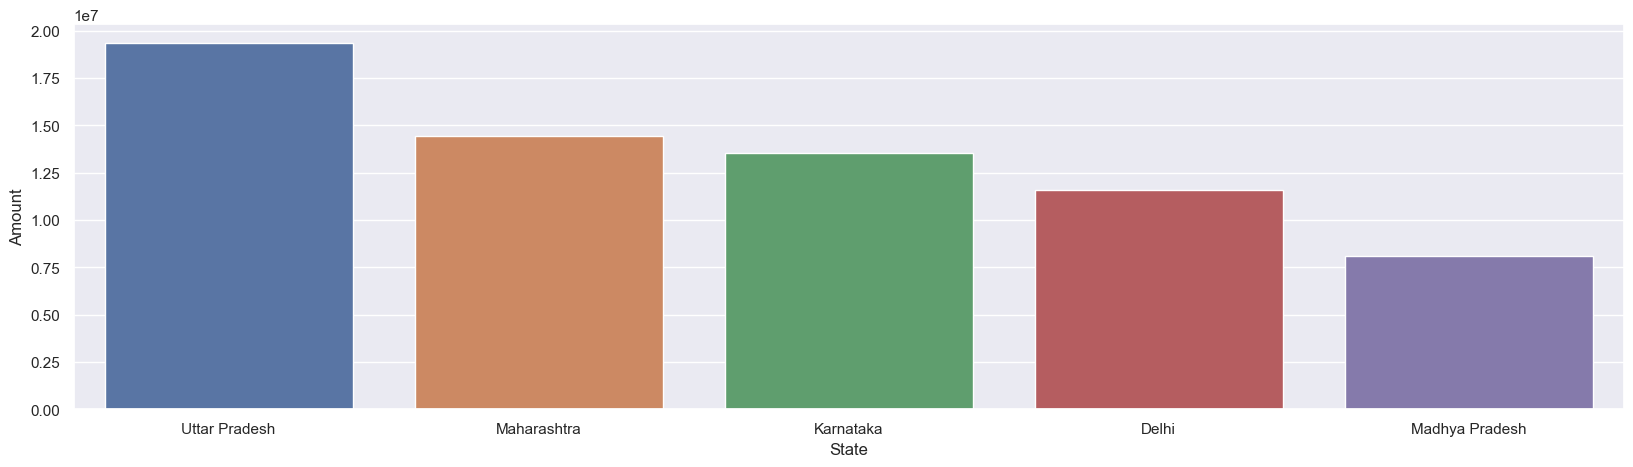

In [80]:
print(data.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5))
a=data.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(x="State",y="Amount",data=a)

In [ ]:
#we can see that in terms of amount as well as quantity  Uttar Pradesh,Maharashtra,Karnataka,Delhi are the top 5 cities in terms of purchase

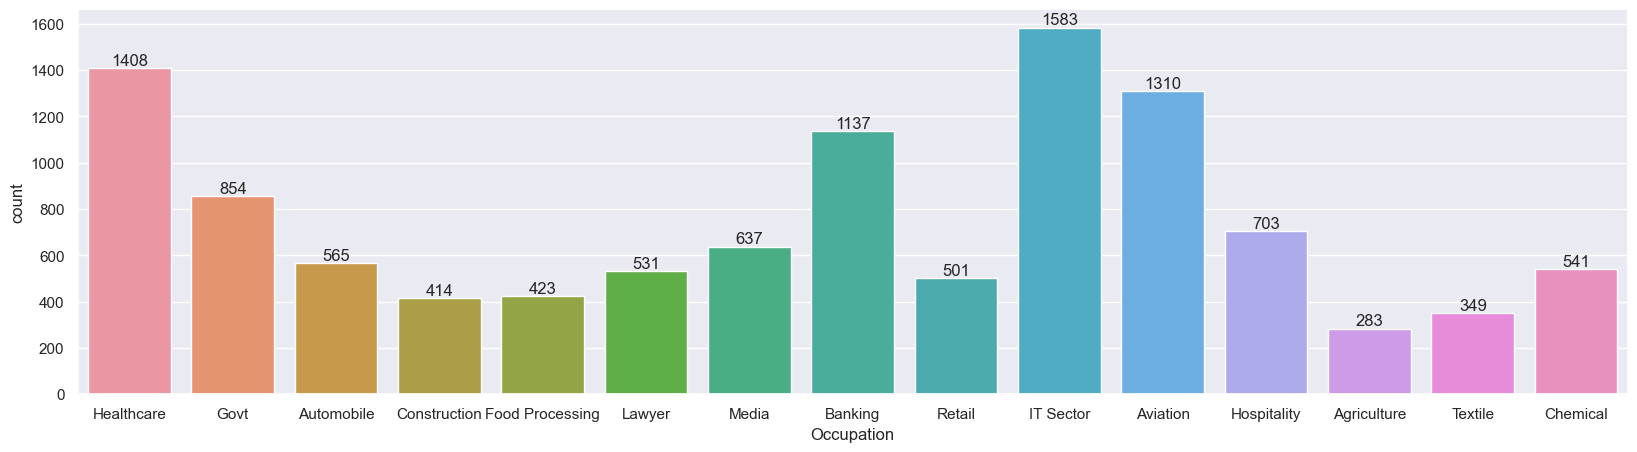

In [87]:
#countplot of people working in different domains
c=sns.countplot(x="Occupation" , data=data)
for bars in c.containers:
    c.bar_label(bars)
#here the maximum buyers are from  IT Sectors, Healthcare, Aviation, Banking Occupation resepectively

<Axes: xlabel='Product_Category', ylabel='count'>

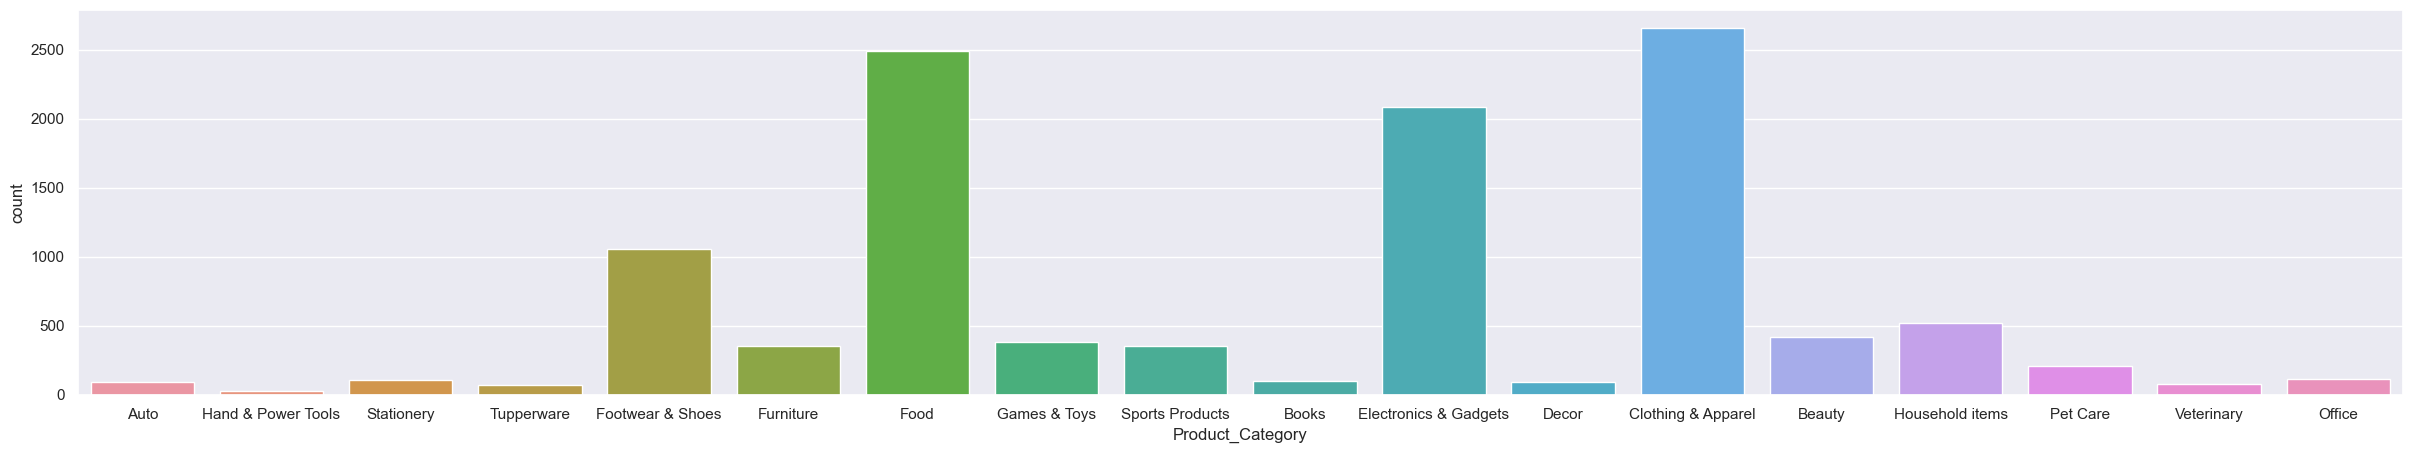

In [90]:
sns.set(rc={"figure.figsize":(30,5)})
sns.countplot(x="Product_Category" , data=data)
#top selling product categories are Clothing and Apparel, Food, Electronic and Gadgets respectively.

<Axes: xlabel='Product_Category', ylabel='Amount'>

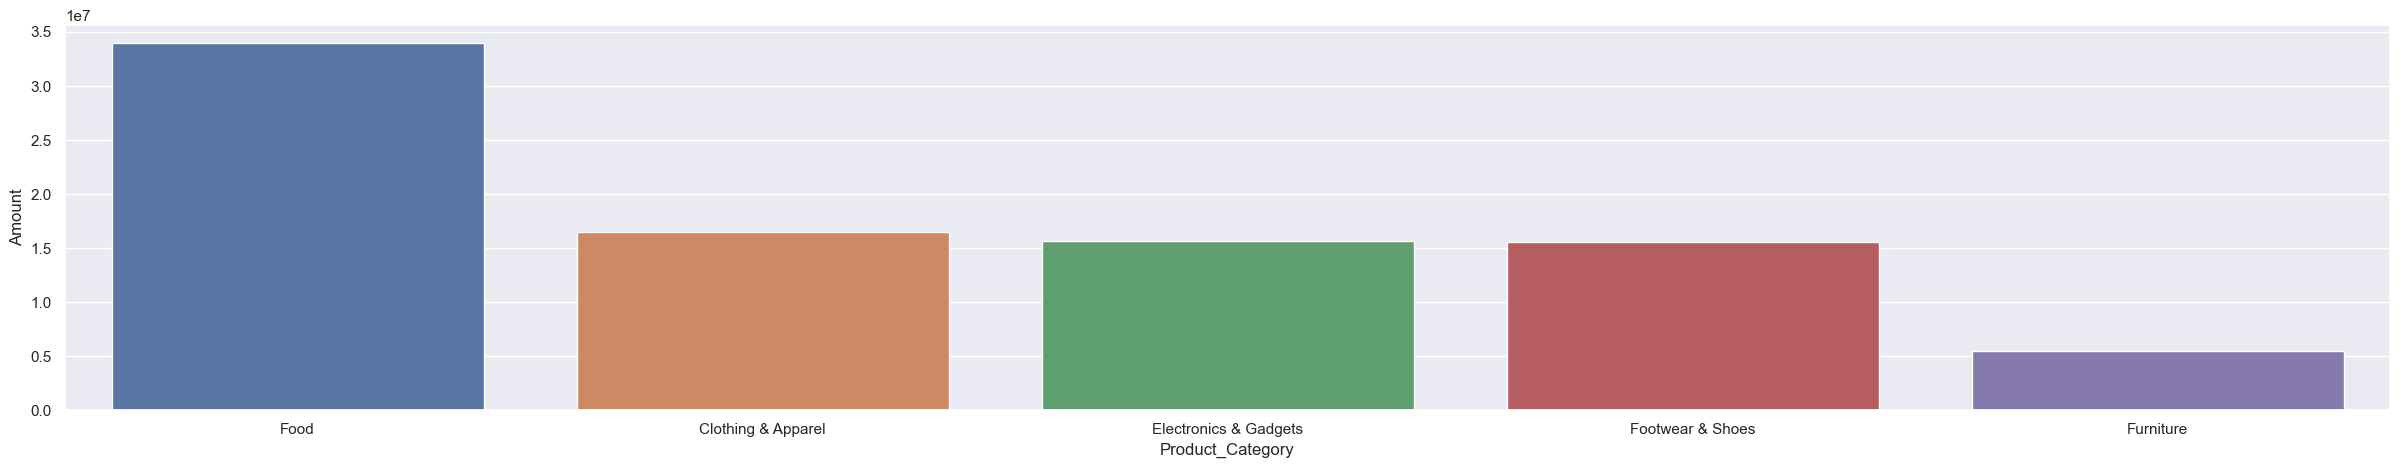

In [92]:
j=data.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5)
sns.barplot(x="Product_Category",y="Amount",data=j)
#in terms of amount spent food is at the top